# NOTES FOR PAPER:


In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy import stats


plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


In [4]:
df.columns

Index(['StartDate', 'reading', 'Duration', 'Progress', 'Finished', 'Q42',
       'Q43', 'Q1', 'Q1_7_TEXT', 'Q2', 'Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q4_1',
       'Q4_2', 'Q4_3', 'Q4_4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5',
       'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q15', 'Q16_1', 'Q16_2', 'Q16_3',
       'Q16_4', 'Q16_5', 'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q17', 'Q18',
       'Q46'],
      dtype='object')

# WANT the scores for timelines, the scores for each QUESTION, familiarity with each alignment concept, familiarity with empirical ML, when should we build?

In [5]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

# replace the qualitative data with the quantitative data

In [6]:
df['Q3_1'].value_counts().sort_index()

Know a fair amount    23
Know a little         13
Know it well          50
Name: Q3_1, dtype: int64

In [7]:
timelines_positions = {
    "We should develop more powerful and more general systems as fast as possible": 5,
    "Soon, but not as fast as possible": 3.75,
    "Eventually, but not soon.": 2.5,
    "We should never build AGI": 1.25
}

agreement_swaps = {
    "strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5,
}

familiarity_swaps = {
    "Never heard of it": 1,
    "Heard of it": 2,
    "Know a little": 3,
    "Know a fair amount": 4,
    "Know it well": 5,
}

pre_questions = [f'Q6_{i}' for i in range(1, 10)]
familiarity_questions = [f'Q3_{i}' for i in range(1, 5)]
alignment_questions = [f'Q4_{i}' for i in range(1, 5)]
timelines_questions = "Q5"


In [8]:
# get just the df of the questions we care about
df = df[pre_questions + familiarity_questions + alignment_questions +  [timelines_questions]]
# df = df[pre_questions + [timelines_questions]]

In [9]:
# replace the strings with numbers
df = df.replace({
    **agreement_swaps,
    **familiarity_swaps,
    **timelines_positions,
})

df

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q3_1,Q3_2,Q3_3,Q3_4,Q4_1,Q4_2,Q4_3,Q4_4,Q5
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
familiarity_questions

['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4']

In [11]:
# rename columns Q6_1 -> Q6_9 to "agreement_x"
df = df.rename(columns={k: f"S{i}" for i, k in enumerate(pre_questions, 1)})

# rename columns Q3_1 -> Q3_3 to "familiarity_x"
# df = df.rename(columns={k: f"familiarity_{i}" for i, k in enumerate(familiarity_questions, 1)})

# rename Q_3_2 to "regression"
df = df.rename(columns={familiarity_questions[0]: "regression"})

# rename Q_3_4 to "markov fields"
df = df.rename(columns={familiarity_questions[3]: "markov fields"})

# rename Q4 to alignment
df = df.rename(columns={alignment_questions[0]: "alignment"})

# rename Q4-3 to instrumental convergence
df = df.rename(columns={alignment_questions[2]: "instrumental convergence"})


# rename Q5 to "timelines"
df = df.rename(columns={timelines_questions: "pref. timelines"})

In [13]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,regression,Q3_2,Q3_3,markov fields,alignment,Q4_2,instrumental convergence,Q4_4,pref. timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,1.0,5.00
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'regression',
       'Q3_2', 'Q3_3', 'markov fields', 'alignment', 'Q4_2',
       'instrumental convergence', 'Q4_4', 'pref. timelines'],
      dtype='object')

In [15]:
# drop the rows with NaN
df = df.dropna()
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,regression,Q3_2,Q3_3,markov fields,alignment,Q4_2,instrumental convergence,Q4_4,pref. timelines
0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,5.00
1,4.0,4.0,1.0,3.0,4.0,2.0,3.0,4.0,5.0,4.0,4.0,2.0,3.0,5.0,1.0,1.0,1.0,3.75
2,4.0,1.0,1.0,3.0,3.0,4.0,1.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,1.0,1.0,2.50
3,2.0,4.0,2.0,3.0,4.0,2.0,4.0,1.0,5.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.25
4,4.0,4.0,2.0,3.0,2.0,1.0,3.0,2.0,5.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,1.0,2.0,1.0,1.0,1.0,1.0,3.75
100,5.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,1.25
102,4.0,4.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,2.50
103,4.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,3.0,2.0,1.0,1.0,5.00


In [16]:
# make a correlation matrix
corr = df.corr()

In [17]:
corr

,S1,S2,S3,S4,S5,S6,S7,S8,S9,regression,Q3_2,Q3_3,markov fields,alignment,Q4_2,instrumental convergence,Q4_4,pref. timelines
S1,1.000000,-0.005166,-0.313766,0.221374,0.331513,0.230755,-0.287302,0.299694,-0.244608,0.197432,0.230830,0.208287,0.281116,-0.089539,-0.272186,-0.136741,-0.011493,0.090855
S2,-0.005166,1.000000,0.125002,-0.076401,-0.237088,-0.172930,0.326589,0.046617,0.107865,-0.068511,0.171893,-0.073315,-0.096168,-0.023520,0.119472,0.066707,0.112756,-0.040233
S3,-0.313766,0.125002,1.000000,0.013704,-0.034143,-0.046094,0.174299,0.079469,0.084881,-0.161909,-0.115639,-0.123525,-0.228421,-0.045934,0.240925,0.135891,0.039442,0.029439
S4,0.221374,-0.076401,0.013704,1.000000,0.463062,0.418361,-0.018712,-0.152006,-0.038145,0.153567,0.122498,0.033165,0.034823,-0.112858,-0.181108,-0.192520,-0.116757,0.028849
S5,0.331513,-0.237088,-0.034143,0.463062,1.000000,0.655633,-0.223534,-0.023160,-0.138537,0.086674,0.061441,0.065975,0.216821,-0.103275,-0.212554,-0.233049,-0.225995,0.306709
S6,0.230755,-0.172930,-0.046094,0.418361,0.655633,1.000000,-0.262518,-0.054194,-0.293925,0.220134,0.031725,0.053144,0.144354,-0.119116,-0.250714,-0.304825,-0.104666,0.253310
S7,-0.287302,0.326589,0.174299,-0.018712,-0.223534,-0.262518,1.000000,0.049621,0.274273,-0.083249,0.120282,-0.104462,-0.145211,0.037964,0.215934,0.172085,0.183766,-0.212192
S8,0.299694,0.046617,0.079469,-0.152006,-0.023160,-0.054194,0.049621,1.000000,-0.058687,-0.018718,0.057306,0.049685,0.028961,-0.107069,0.032843,0.057444,0.078068,0.236042
S9,-0.244608,0.107865,0.084881,-0.038145,-0.138537,-0.293925,0.274273,-0.058687,1.000000,-0.042031,-0.058254,-0.003448,-0.200602,-0.055983,0.056483,0.092733,0.004860,-0.185231
regression,0.197432,-0.068511,-0.161909,0.153567,0.086674,0.220134,-0.083249,-0.018718,-0.042031,1.000000,0.600556,0.391326,0.372306,0.156405,0.106696,0.092794,0.053319,0.016290


In [18]:
# Q3: How familiar are you with the following empirical AI concepts?
# Q4: How familiar are you with the following theoretical AI Alignment concepts?
# Q5: Which best describes your position on when we should build AGI (Artificial General Intelligence)? # For the purposes of this survey, we define AGI as: AI systems that are better at STEM research than the best human scientists, in addition to potentially having other advanced capabilities.

# Q6: rate your agreement with the following statements

In [19]:
# 5 = STRONGLY agree
# 5 == for when should we build 

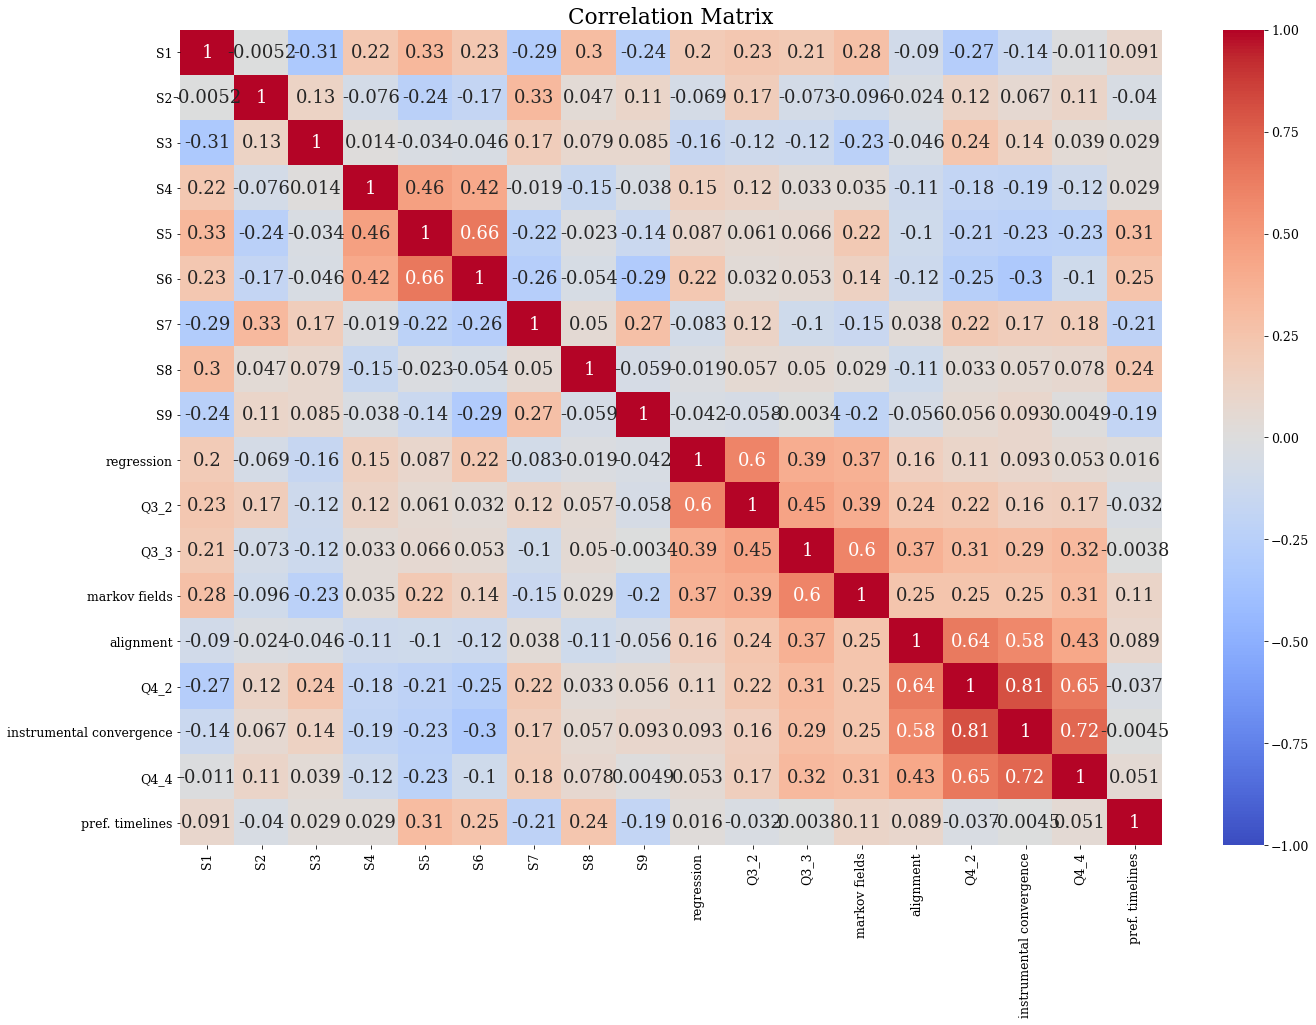

In [20]:
# plot the correlation matrix
plt.figure(figsize=(22, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [38]:
def plot_single_variable_correlations(df, row_var, column_vars, alpha=0.05, display_sig=True, title=None, save_dir=None):
    """
    Creates professional-quality scatterplots showing correlations between one variable and multiple others.
    """
    # Calculate number of plots and grid layout
    n_plots = len(column_vars)
    n_cols = 4
    n_rows = int(np.ceil(n_plots / n_cols))
    
    # Create figure with larger size per plot (5 inches per plot as in your original)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
    
    # Flatten axes for easier iteration
    if n_rows > 1:
        axes = axes.flatten()
    elif n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Set style parameters
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['xtick.labelsize'] = 'medium'
    plt.rcParams['ytick.labelsize'] = 'medium'
    
    for i, col_var in enumerate(column_vars):
        ax = axes[i]
        
        # Create scatter plot
        sns.scatterplot(data=df, x=row_var, y=col_var, ax=ax)
        
        # Add regression line with original style
        sns.regplot(data=df, x=row_var, y=col_var, ax=ax, 
                   scatter=False, color='red')
        
        # Calculate correlation coefficient and p-value
        r, p = stats.pearsonr(df[row_var], df[col_var])
        
        # Determine significance and set text color
        if p < alpha:
            text_color = 'green'
            sig_text = 'significant'
        else:
            text_color = 'red'
            sig_text = 'not significant'
        
        # Add correlation information with original positioning
        if display_sig:
            ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                   transform=ax.transAxes, verticalalignment='top', 
                   color=text_color, fontweight='bold')
        
        # Set labels
        ax.set_xlabel(row_var)
        ax.set_ylabel(col_var)
        
        # Set consistent axis limits
        ax.set_xlim(1, 5)  # Assuming 1-5 scale as shown in your image
        ax.set_ylim(1, 5)
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust spacing between plots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
    if title:
        # plt.suptitle(title)
        print("title disabled")
    # Save figure
    if save_dir:
        plt.savefig(save_dir)
    plt.show()

In [39]:
df.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'regression',
       'Q3_2', 'Q3_3', 'markov fields', 'alignment', 'Q4_2',
       'instrumental convergence', 'Q4_4', 'pref. timelines'],
      dtype='object')

title disabled


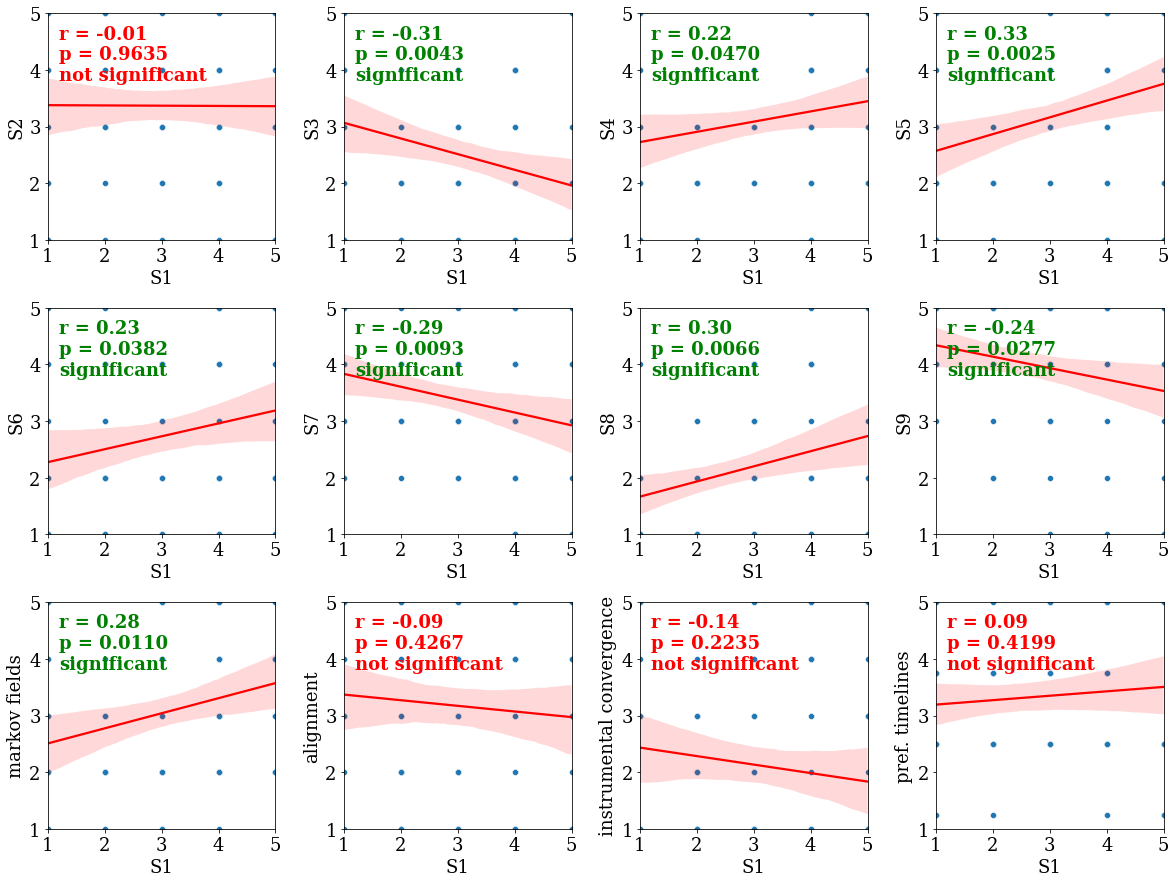

In [40]:
rows_to_plot = ['S1']
columns_to_plot = ['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']

plot_single_variable_correlations(df, rows_to_plot[0], columns_to_plot, title='Correlations with Statement 1: "AGI is too far away to be worth worrying about"', save_dir='figs/correlations_w_s1.pdf')

In [41]:
# 5 = STRONGLY agree
# 5 == for when should we build 

title disabled


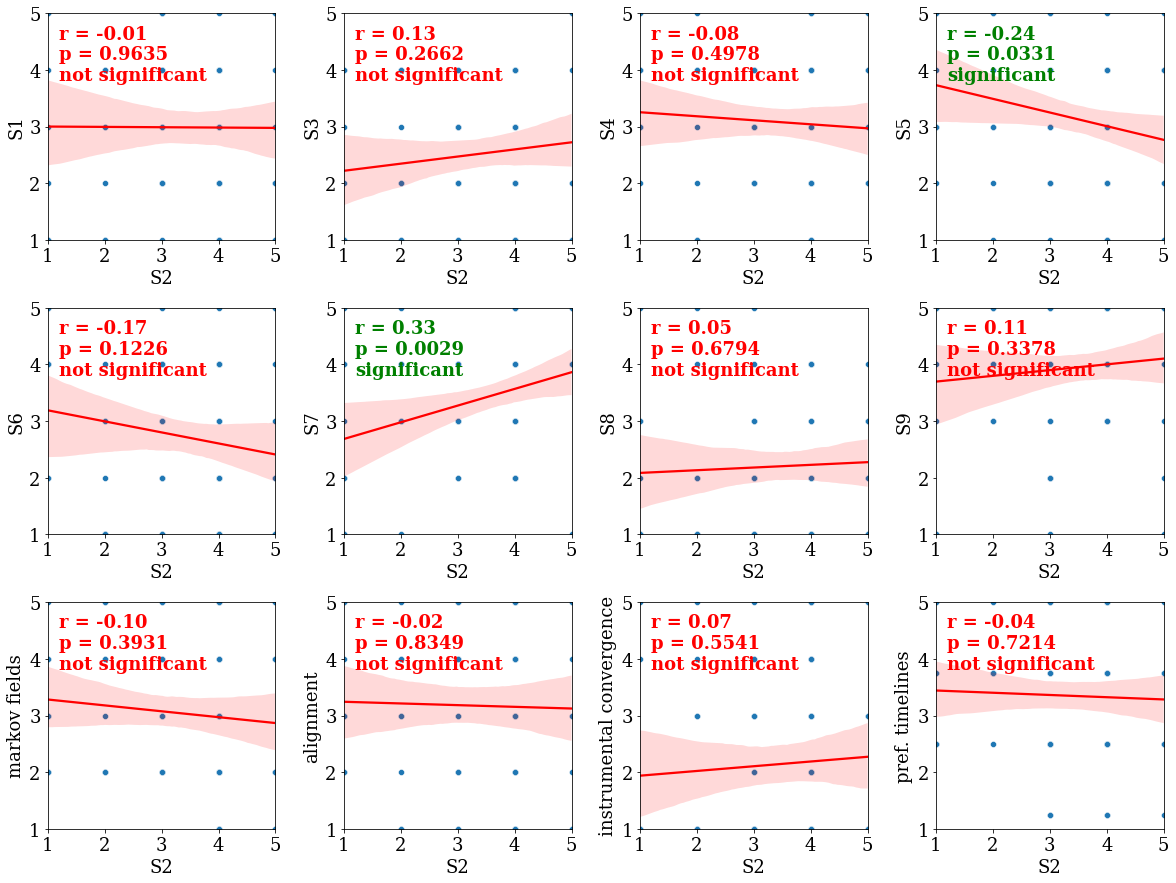

title disabled


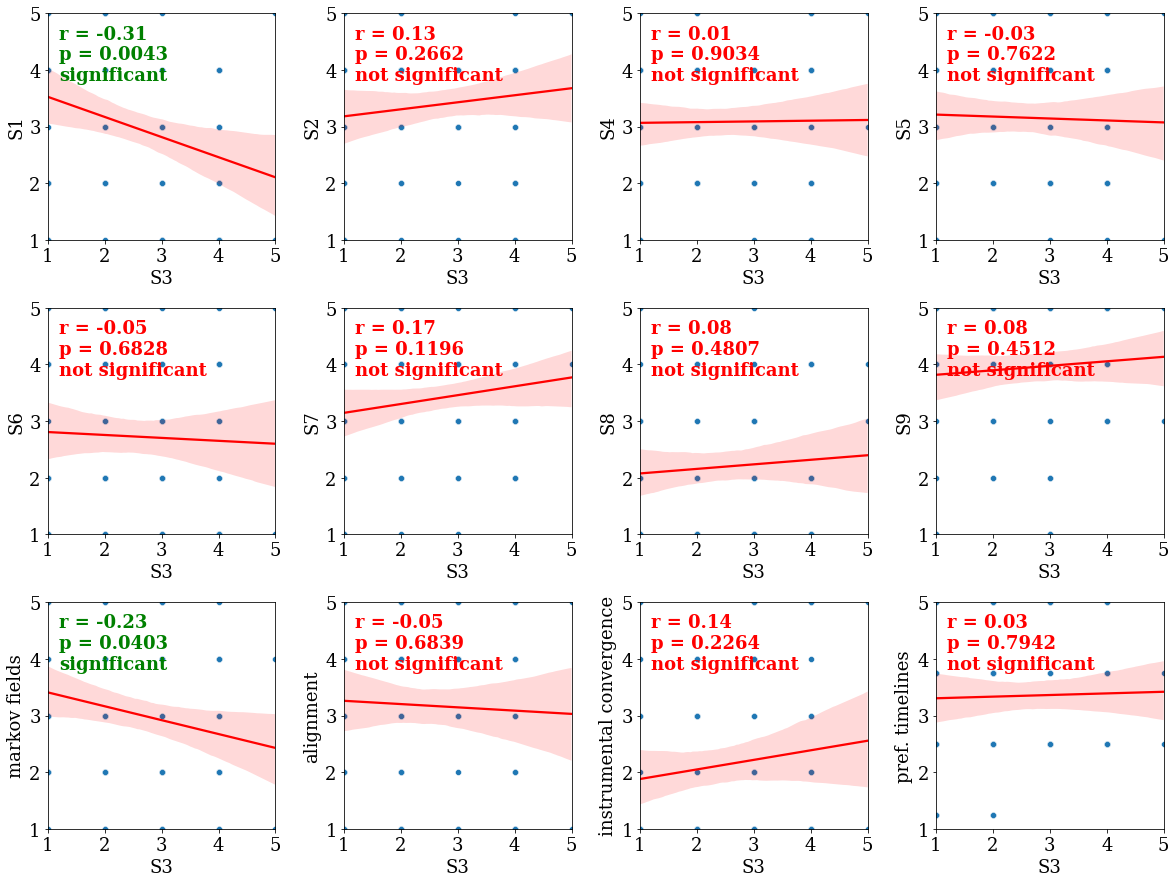

title disabled


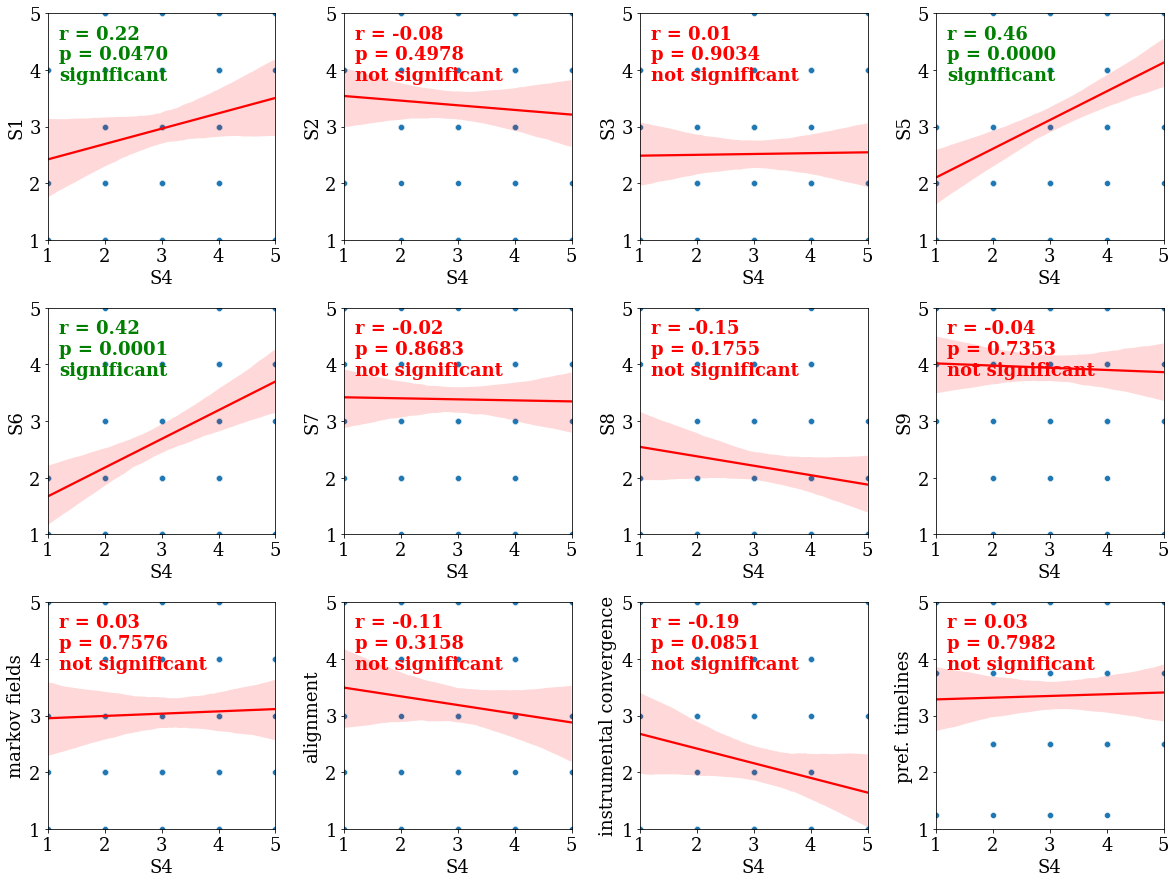

title disabled


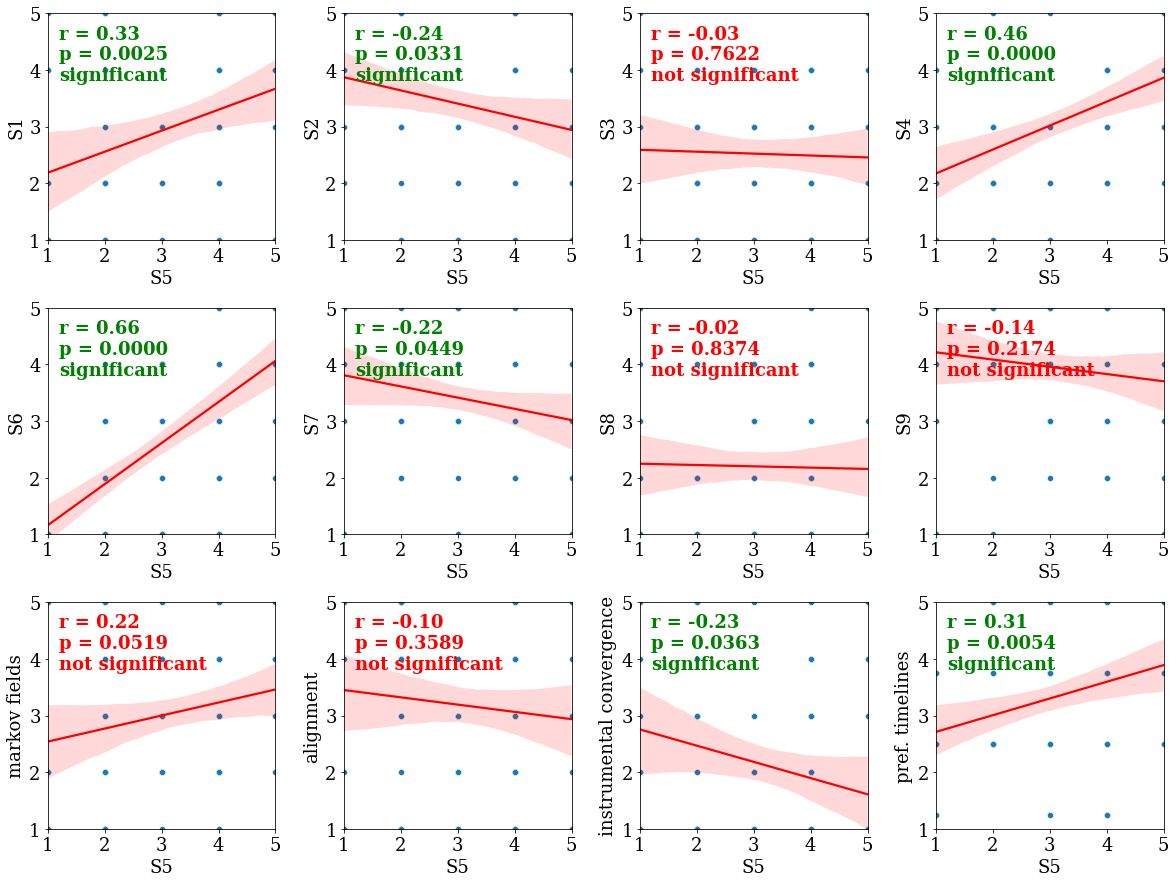

title disabled


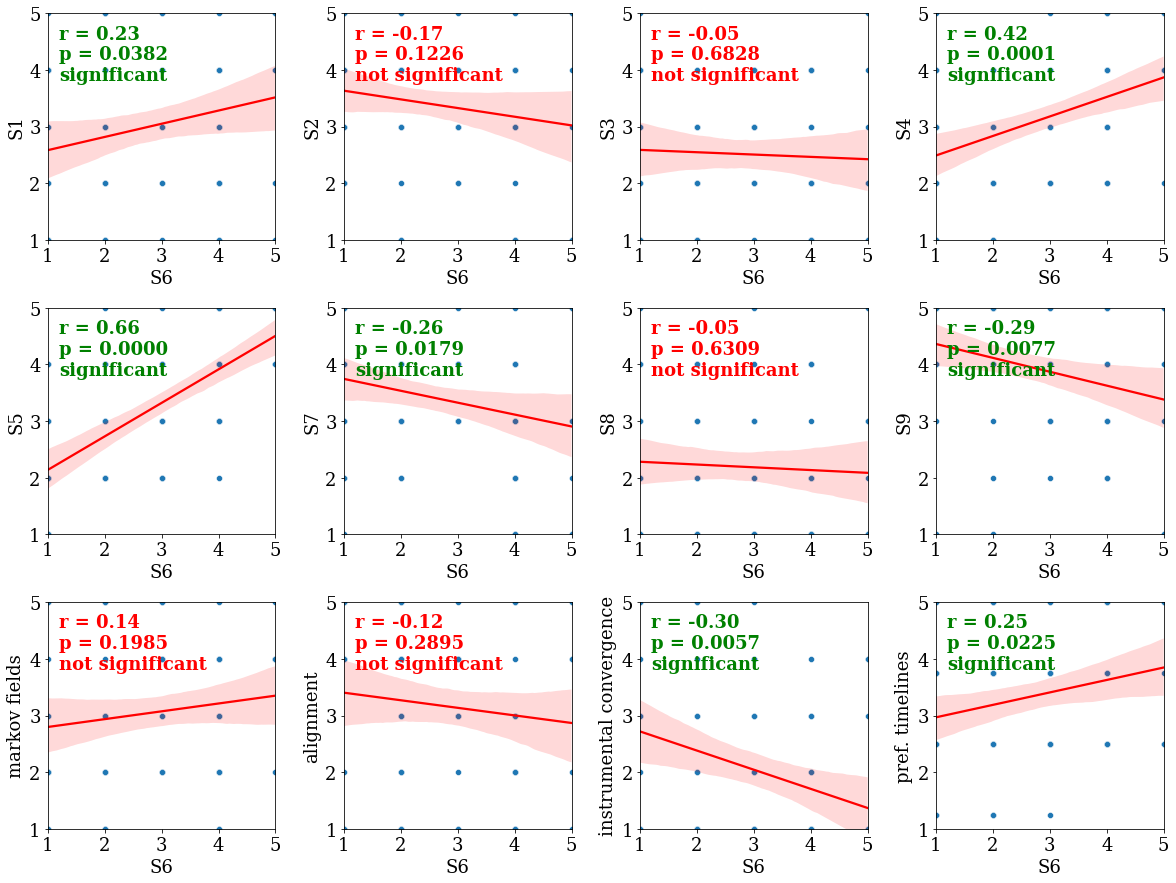

title disabled


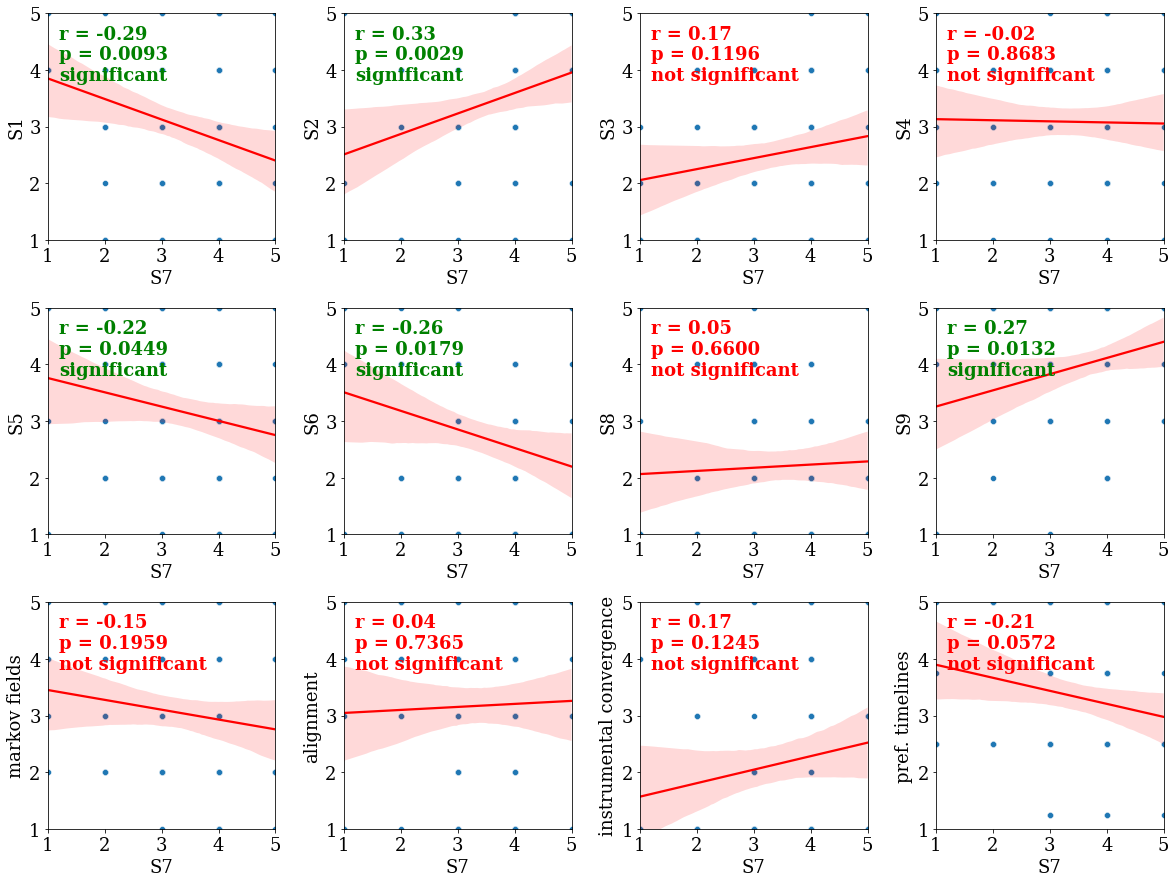

title disabled


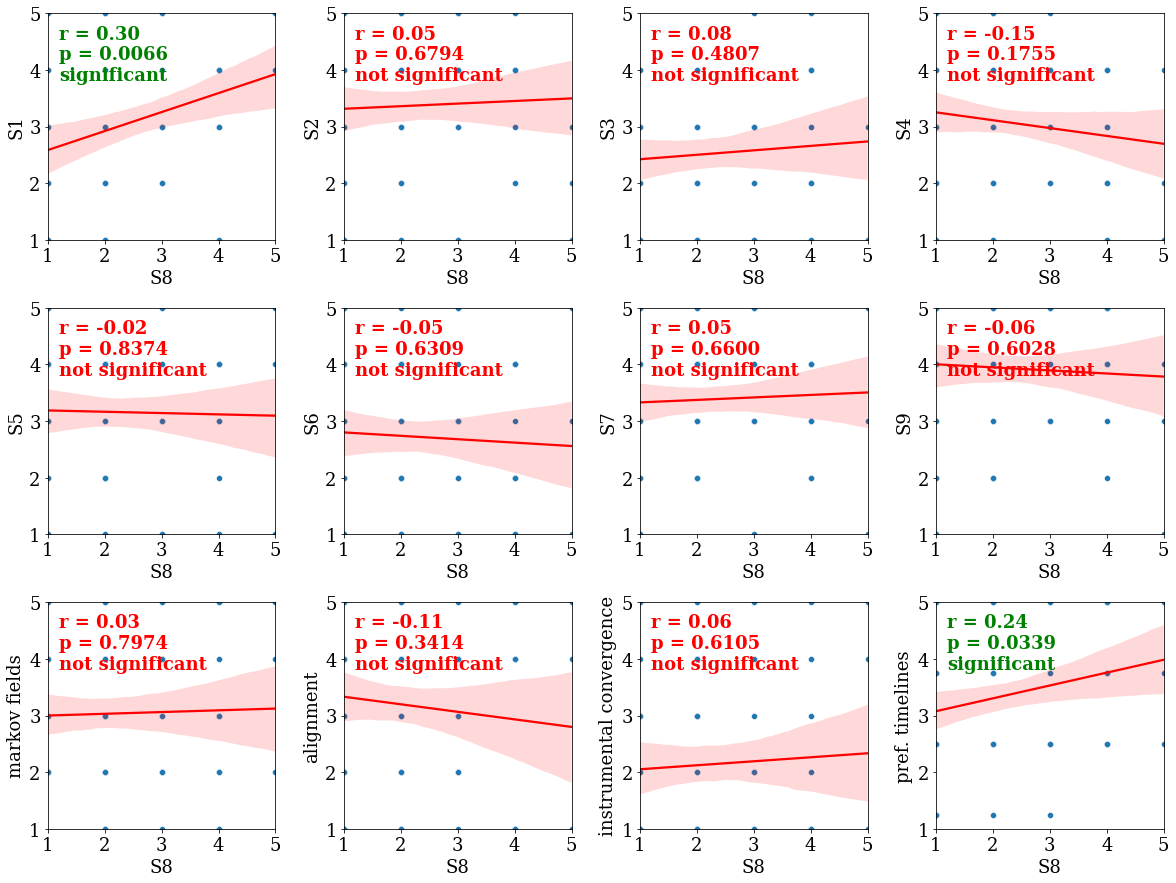

title disabled


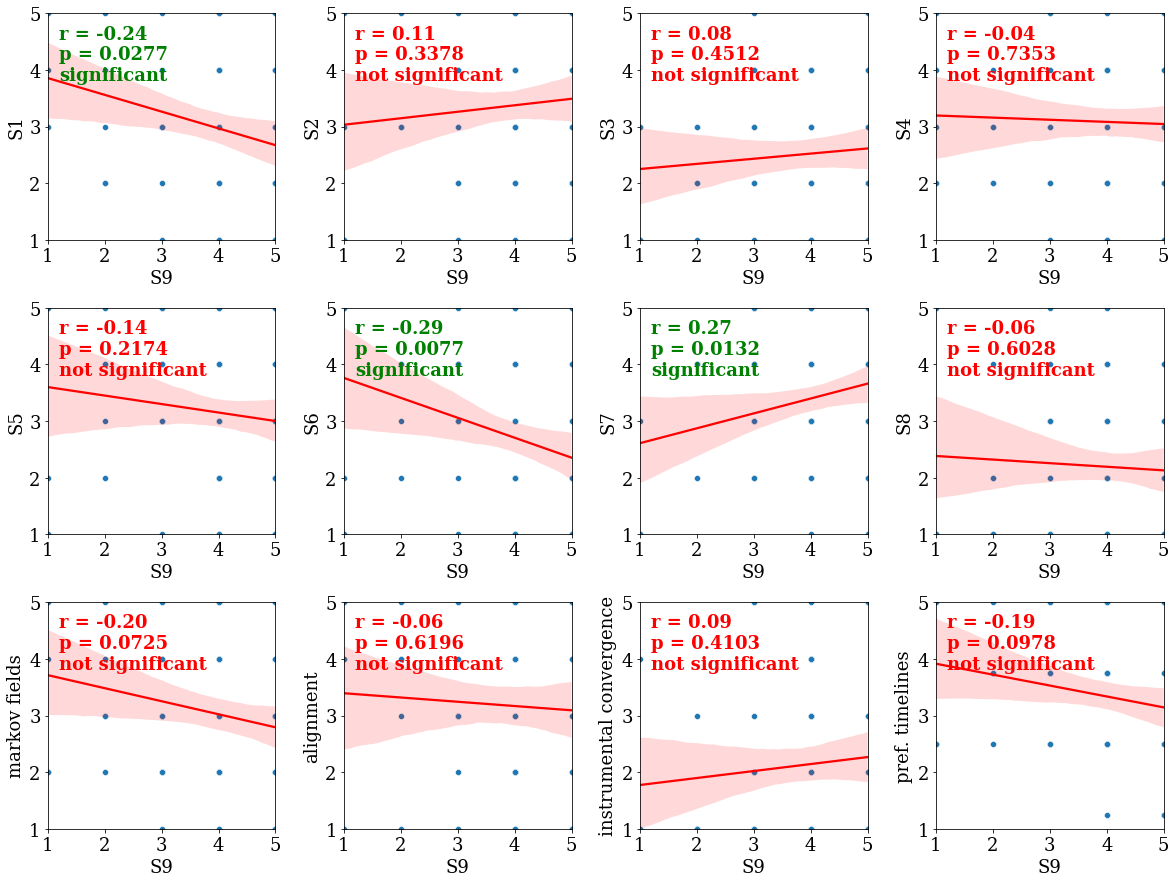

In [42]:
'''

1
AGI is too far away to be worth worrying about
2
Some AI's (now or in the future) may be moral patients, with their own welfare that we should care about
3
Existing ML paradigms can produce AGI
4
Future AI's will be tools without their own goals or drives
5
Catastrophic risks from advanced AI are generally overstated
6
We can always just turn off our AI's if they behave badly
7
Self-preservation and control drives will spontaneously emerge in sufficiently advanced ai's
8
Safety work often slows important progress and wastes time
9
technical AI researchers should be concerned about catastrophic risks


'''
columns_to_plot = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']


# correlations for s2 (DO NOT INCLUDE S2 in columns_to_plot)
columns_to_plot_s2 = ['S1', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S2', columns_to_plot_s2, title='Correlations with Statement 2: "Some AI\'s (now or in the future) may be moral patients, with their own welfare that we should care about"', save_dir='figs/correlations_w_s2.pdf')

# correlations for s3
columns_to_plot_s3 = ['S1', 'S2', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S3', columns_to_plot_s3, title='Correlations with Statement 3: "Existing ML paradigms can produce AGI"', save_dir='figs/correlations_w_s3.pdf')

# correlations for s4
columns_to_plot_s4 = ['S1', 'S2', 'S3', 'S5', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S4', columns_to_plot_s4, title='Correlations with Statement 4: "Future AI\'s will be tools without their own goals or drives"', save_dir='figs/correlations_w_s4.pdf')

# correlations for s5
columns_to_plot_s5 = ['S1', 'S2', 'S3', 'S4', 'S6', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S5', columns_to_plot_s5, title='Correlations with Statement 5: "Catastrophic risks from advanced AI are generally overstated"', save_dir='figs/correlations_w_s5.pdf')

# correlations for s6
columns_to_plot_s6 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S7', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S6', columns_to_plot_s6, title='Correlations with Statement 6: "We can always just turn off our AI\'s if they behave badly"', save_dir='figs/correlations_w_s6.pdf')

# correlations for s7
columns_to_plot_s7 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S8', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S7', columns_to_plot_s7, title='Correlations with Statement 7: "Self-preservation and control drives will spontaneously emerge in sufficiently advanced ai\'s"', save_dir='figs/correlations_w_s7.pdf')

# correlations for s8
columns_to_plot_s8 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S9', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S8', columns_to_plot_s8, title='Correlations with Statement 8: "Safety work often slows important progress and wastes time"', save_dir='figs/correlations_w_s8.pdf')

# correlations for s9
columns_to_plot_s9 = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'markov fields', 'alignment', 'instrumental convergence', 'pref. timelines']
plot_single_variable_correlations(df, 'S9', columns_to_plot_s9, title='Correlations with Statement 9: "technical AI researchers should be concerned about catastrophic risks"', save_dir='figs/correlations_w_s9.pdf')






# OLD

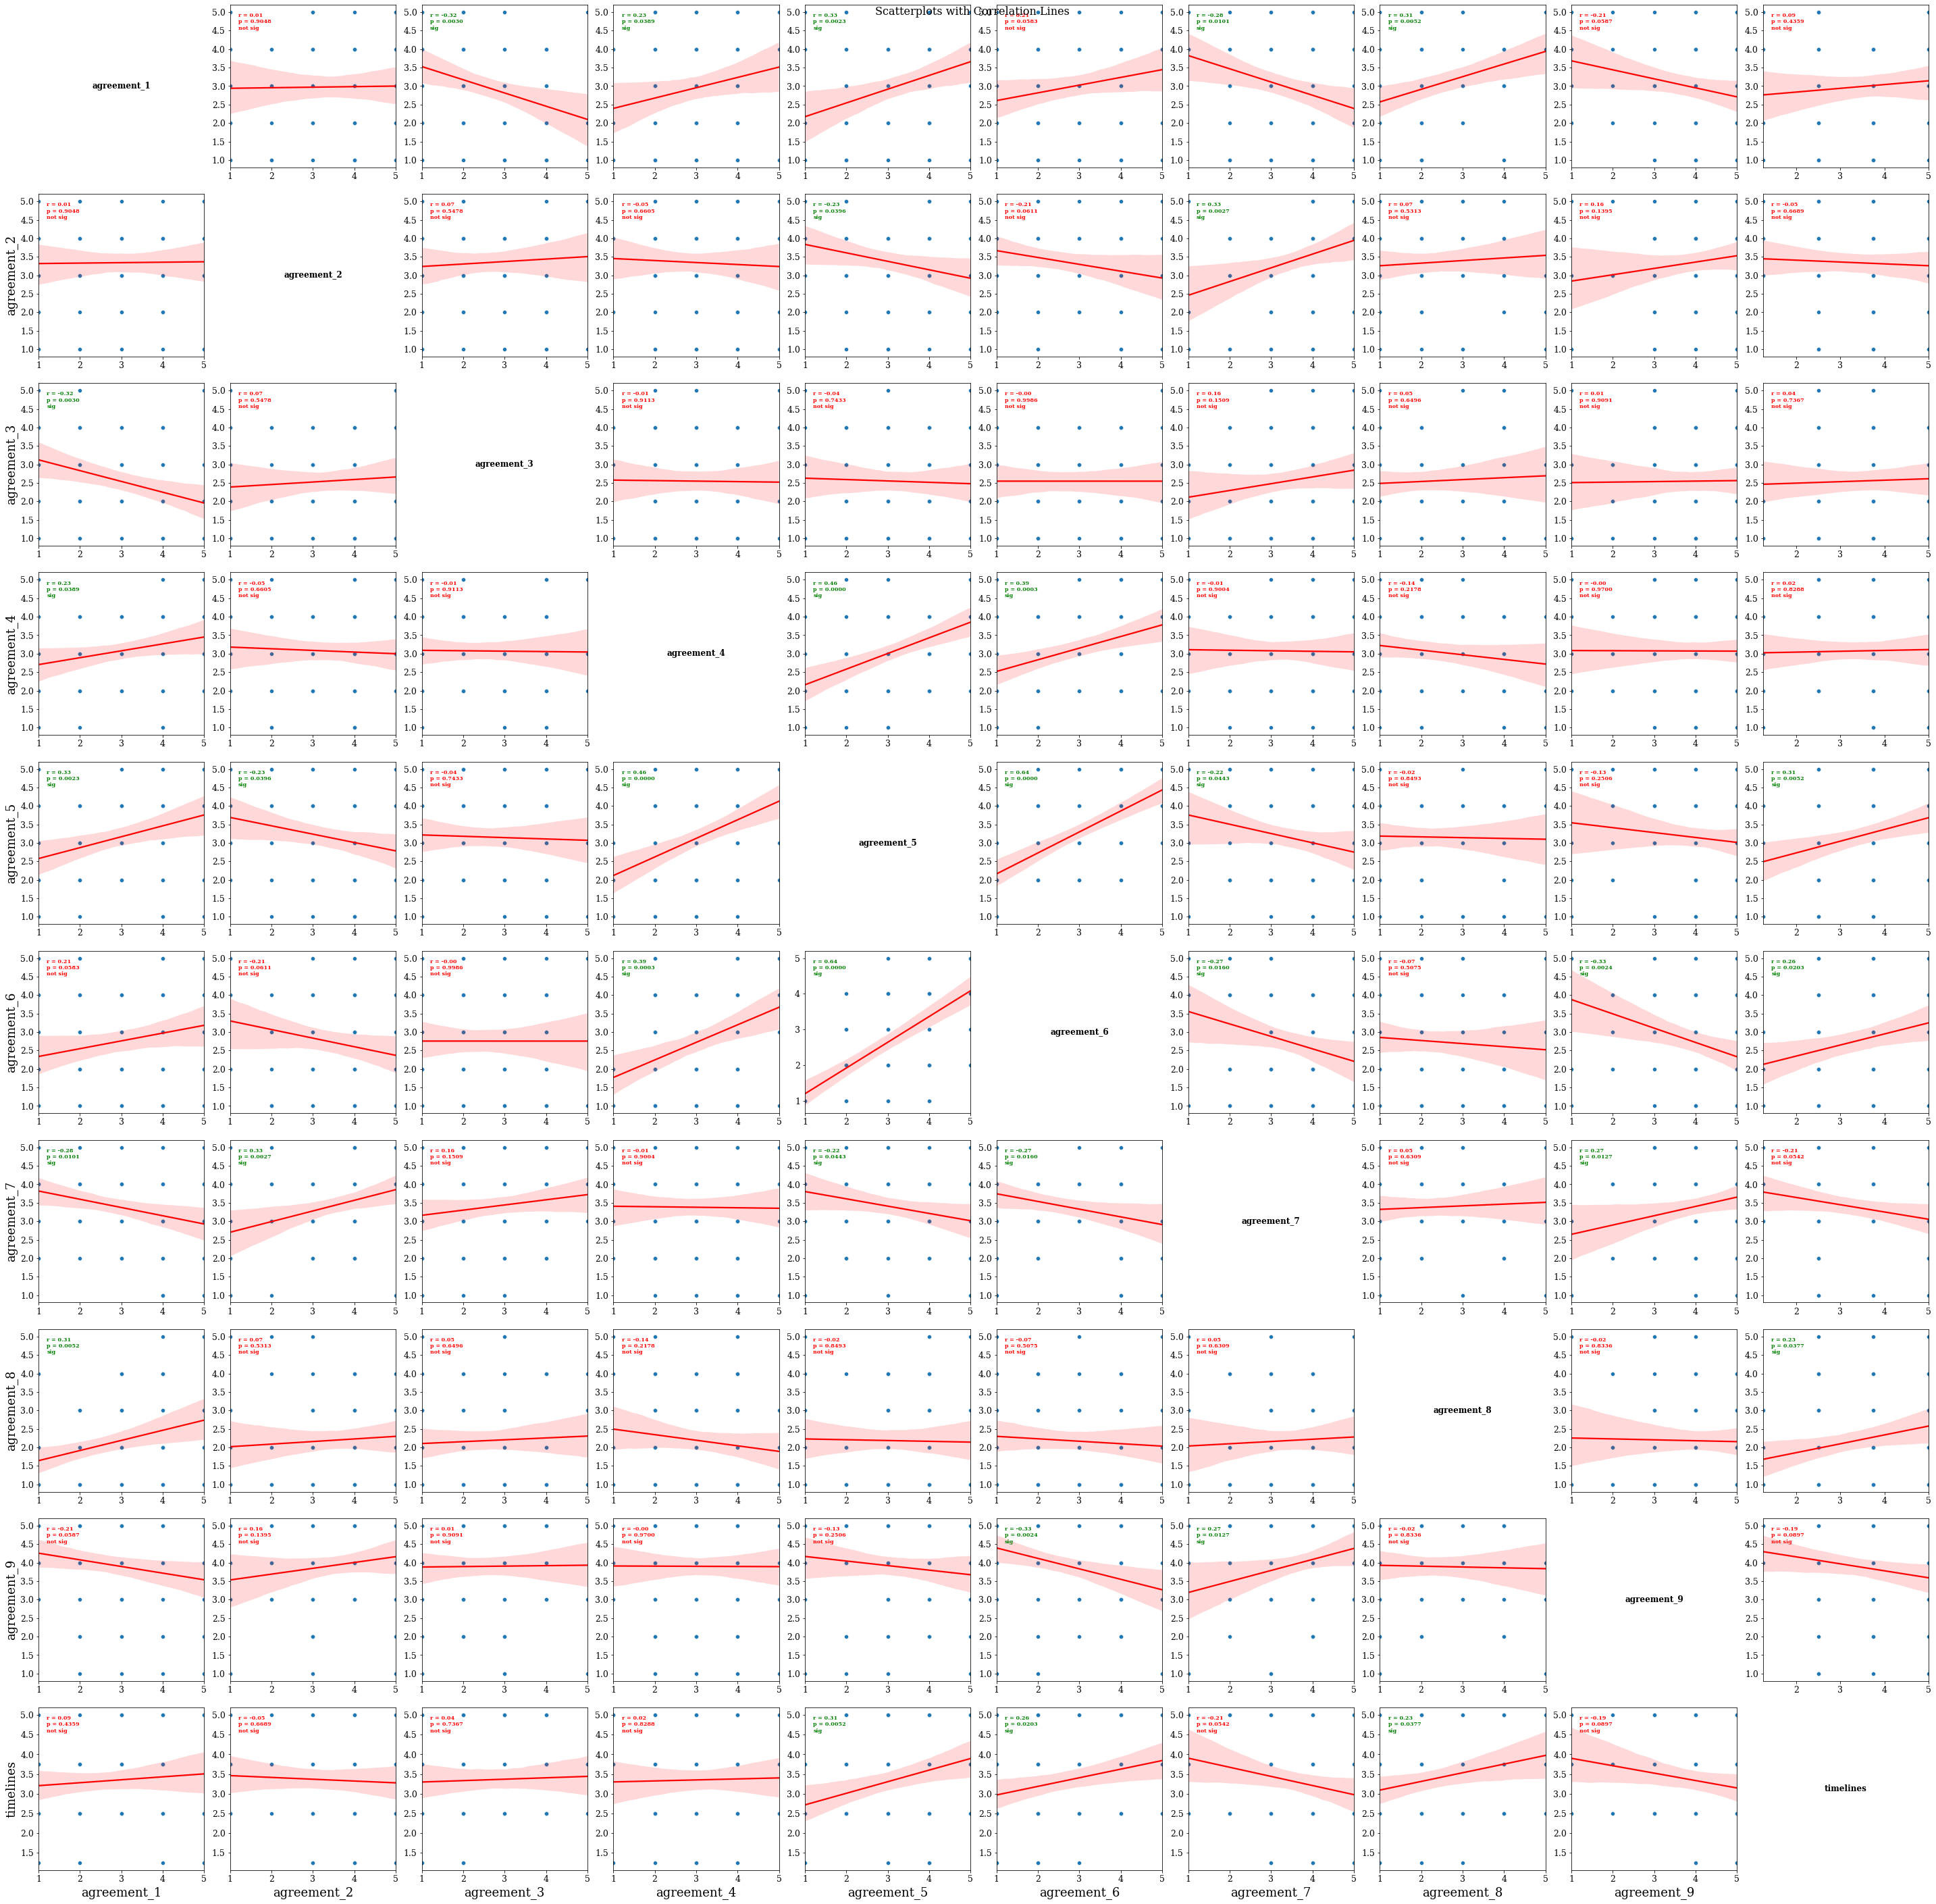

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_scatterplot_matrix(df, columns, output_filename='scatterplot_matrix_latest.pdf', alpha=0.05, display_sig=True):
    n = len(columns)
    fig, axes = plt.subplots(n, n, figsize=(4*n, 4*n))
    fig.suptitle("Scatterplots with Correlation Lines", fontsize=16)
    
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            ax = axes[i, j]
            
            if i != j:
                sns.scatterplot(data=df, x=col2, y=col1, ax=ax)
                sns.regplot(data=df, x=col2, y=col1, ax=ax, scatter=False, color='red')
                
                r, p = stats.pearsonr(df[col2], df[col1])
                
                if display_sig:
                    if p < alpha:
                        text_color = 'green'
                        sig_text = 'sig'
                    else:
                        text_color = 'red'
                        sig_text = 'not sig'
                    
                    ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                            transform=ax.transAxes, verticalalignment='top', 
                            color=text_color, fontweight='bold', fontsize=8)
            else:
                ax.text(0.5, 0.5, col1, horizontalalignment='center', 
                        verticalalignment='center', fontsize=12, fontweight='bold')
                ax.axis('off')
            
            if i < n-1:
                ax.set_xlabel('')
            if j > 0:
                ax.set_ylabel('')
            
            if i == n-1:
                ax.set_xlabel(col2)
            if j == 0:
                ax.set_ylabel(col1)
    
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.show()

# Example usage
# columns_to_plot = ['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q3_1', 'Q3_2', 'Q3_3', 'Q5']
columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'timelines']


# Assuming 'df' is your DataFrame
plot_scatterplot_matrix(df, columns_to_plot, display_sig=True)

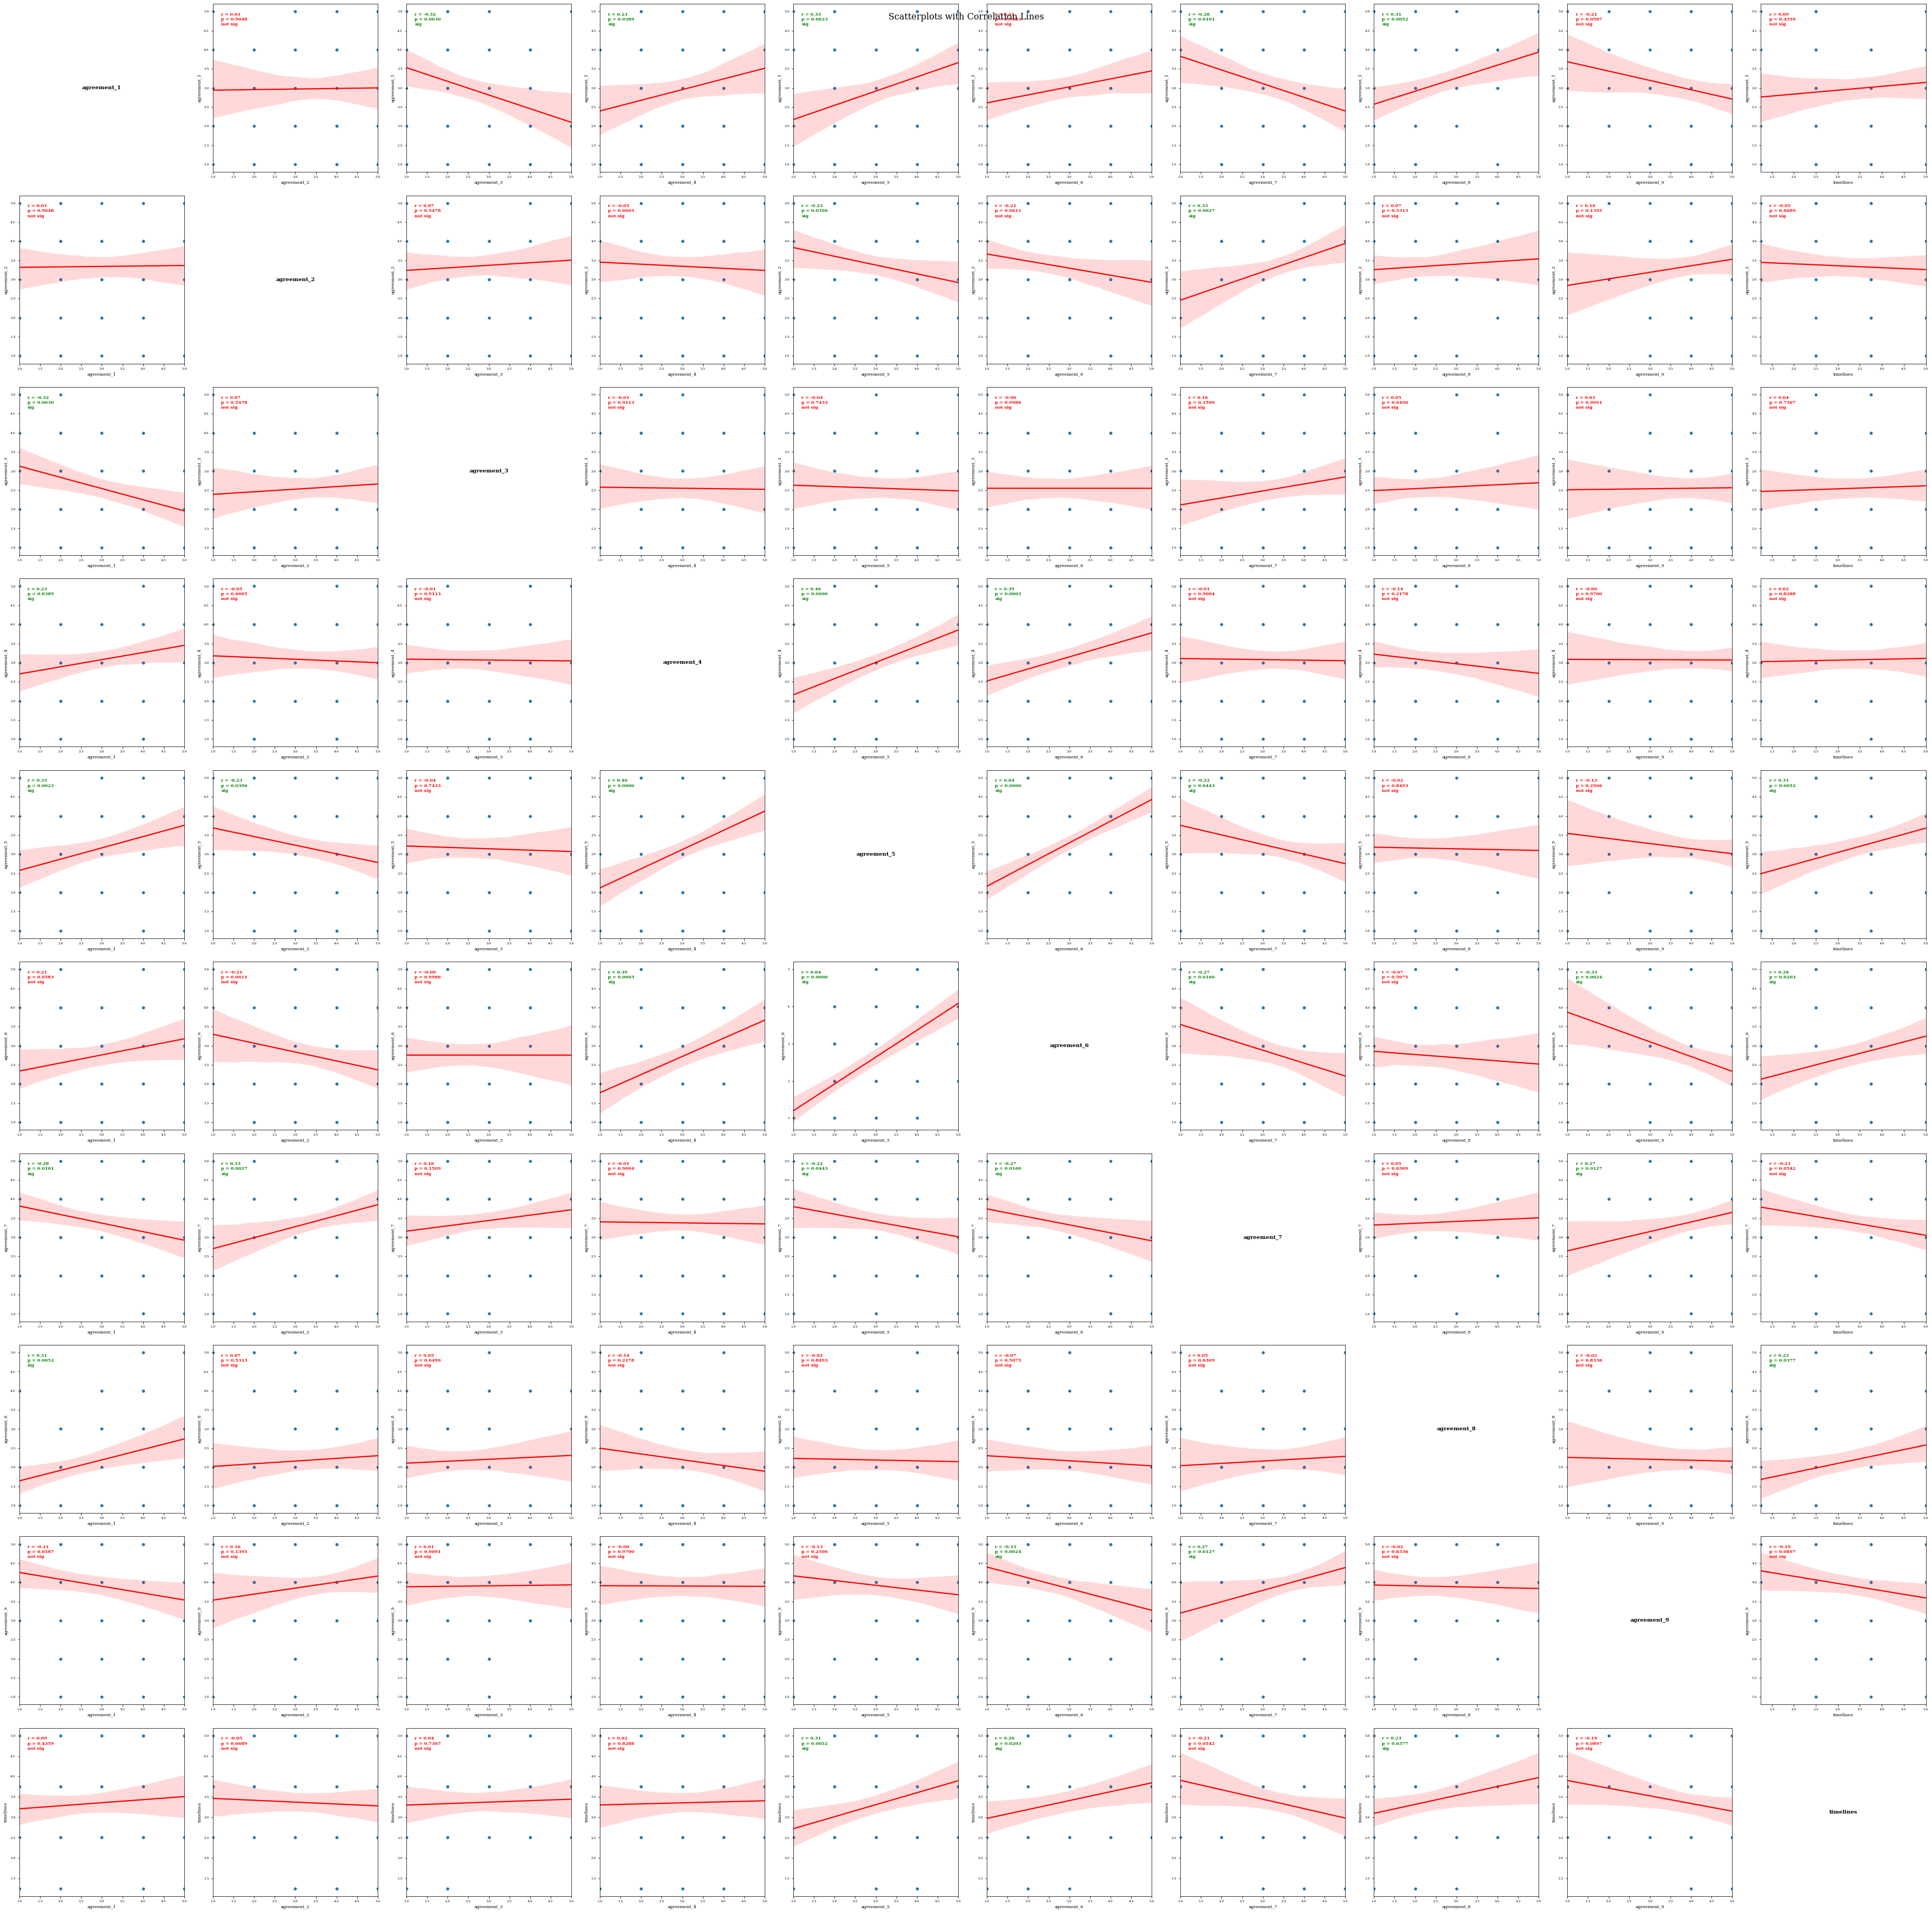

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

def plot_scatterplot_matrix(df, columns, output_filename='scatterplot_matrix.pdf', alpha=0.05, display_sig=True):
    n = len(columns)
    fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))
    fig.suptitle("Scatterplots with Correlation Lines", fontsize=16)
    
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            ax = axes[i, j]
            
            if i != j:
                sns.scatterplot(data=df, x=col2, y=col1, ax=ax)
                sns.regplot(data=df, x=col2, y=col1, ax=ax, scatter=False, color='red')
                
                r, p = stats.pearsonr(df[col2], df[col1])
                
                if display_sig:
                    if p < alpha:
                        text_color = 'green'
                        sig_text = 'sig'
                    else:
                        text_color = 'red'
                        sig_text = 'not sig'
                    
                    ax.text(0.05, 0.95, f'r = {r:.2f}\np = {p:.4f}\n{sig_text}', 
                            transform=ax.transAxes, verticalalignment='top', 
                            color=text_color, fontweight='bold', fontsize=8)
                
                ax.set_xlabel(col2, fontsize=8)
                ax.set_ylabel(col1, fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=6)
            else:
                ax.text(0.5, 0.5, col1, horizontalalignment='center', 
                        verticalalignment='center', fontsize=10, fontweight='bold')
                ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(output_filename, dpi=300)
    plt.show()
    plt.close()

# Example usage
columns_to_plot = ['agreement_1', 'agreement_2', 'agreement_3', 'agreement_4','agreement_5', 'agreement_6', 'agreement_7', 'agreement_8','agreement_9', 'timelines']

# Assuming 'df' is your DataFrame
plot_scatterplot_matrix(df, columns_to_plot, display_sig=True)

In [17]:
timelines_questions

'Q5'

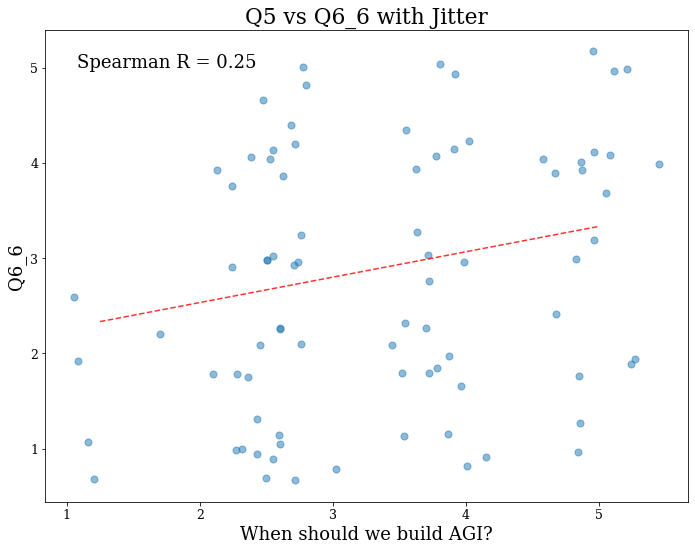

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

def jitter_scatter(x, y, ax=None, jitter=0.2, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    x_jitter = np.random.normal(0, jitter, size=len(x))
    y_jitter = np.random.normal(0, jitter, size=len(y))
    
    ax.scatter(x + x_jitter, y + y_jitter, alpha=0.5, **kwargs)

# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(10, 8))

x = df['Q5'].astype(float)
y = df['Q6_6'].astype(float)

jitter_scatter(x, y, ax=ax, s=50)

# Use theilslopes for robust linear regression
slope, intercept, _, _ = stats.theilslopes(y, x)

# Add trendline
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept
ax.plot(x_line, y_line, "r--", alpha=0.8)

# Calculate and display correlation
correlation, _ = stats.spearmanr(x, y)  # Using Spearman's rank correlation
ax.text(0.05, 0.95, f'Spearman R = {correlation:.2f}', transform=ax.transAxes, 
        verticalalignment='top')

ax.set_xlabel('When should we build AGI?')
ax.set_ylabel('Q6_6')  # Replace with actual question text
ax.set_title('Q5 vs Q6_6 with Jitter')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'When should we build AGI?')

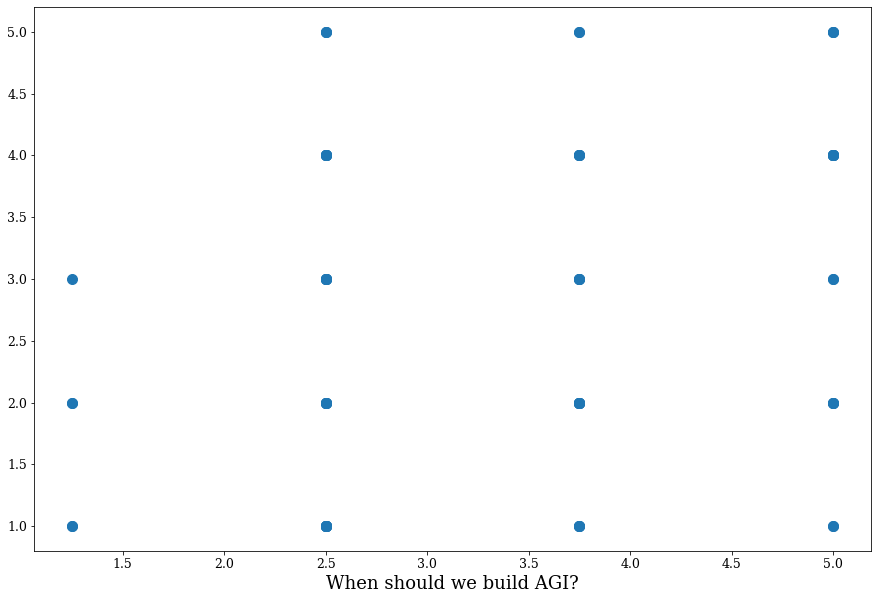

In [19]:
# plot Q_5 vs Q_6_6 as a scatter plot such that the size of the points is the number at that point
plt.figure(figsize=(15, 10))
plt.scatter(df['Q5'], df['Q6_6'], s=100)
plt.xlabel("When should we build AGI?")



